<a href="https://colab.research.google.com/github/MeghaJinto/Diamond-Price-Prediction/blob/main/Project_Amazon_Product_Reviews_and_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# New Section

# 1. analyse the data

In [3]:

df=pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.shape

(1465, 16)

In [5]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


# 2. Cleaning the data

In [7]:
df=df.dropna(axis=0,how="any")
df.shape

(1463, 16)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

In [10]:
df=df.drop(columns=["product_link","img_link","review_id","user_name","review_content"])
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second..."


In [11]:
import re
text="2.3"
text=re.sub('[^0-9.]', '1', text)
text

'2.3'

In [12]:
df["category"]=df["category"].replace("\|+[A-Za-z1-9\s\W]*","",regex=True)
df["discount_percentage"]=df["discount_percentage"].replace('[^0-9]',"",regex=True).astype(int)
df["discounted_price"]=df["discounted_price"].replace('[^0-9]',"",regex=True).astype(float)
df["actual_price"]=df["actual_price"].replace('[^0-9]',"",regex=True).astype(float)
df["rating"] = df["rating"].replace('[^0-9.]', '1', regex=True).astype(float)
df["rating_count"] = df["rating_count"].replace('[^0-9.]', '', regex=True).astype(float)
df["price_after_discount"]=df["actual_price"]-df["discounted_price"]
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title,price_after_discount
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo...",700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go...",150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W...",1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product...",370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second...",245.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Received the product without spanner,Excellent...",540.0
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","ok,everything was good couldn't return bcoz I ...",765.0
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Home&Kitchen,2219.0,3080.0,28,3.6,468.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","very good,Work but front melt after 2 month,Go...",861.0
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,Home&Kitchen,1399.0,1890.0,26,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Fan Speed is slow,Good quality,Good product,go...",491.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1463 non-null   object 
 1   product_name          1463 non-null   object 
 2   category              1463 non-null   object 
 3   discounted_price      1463 non-null   float64
 4   actual_price          1463 non-null   float64
 5   discount_percentage   1463 non-null   int64  
 6   rating                1463 non-null   float64
 7   rating_count          1463 non-null   float64
 8   about_product         1463 non-null   object 
 9   user_id               1463 non-null   object 
 10  review_title          1463 non-null   object 
 11  price_after_discount  1463 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 148.6+ KB


# Processing Product_Name,about_product,review_title using Fasttext, stopwords, punctuation and Lemmatization

In [14]:
import re
import nltk
import spacy
from nltk.stem import PorterStemmer
nlp=spacy.load("en_core_web_sm")
stemmer=PorterStemmer()
def process(data):
    # removes the numbers and special character
    data=re.sub('[\d\WX]'," ",data)
    data=re.sub(' +'," ",data)
    msgs=""
    # lemmatization
    data=nlp(data.lower())
    for msg in data:
        if  msg.is_punct or not msg.is_stop:
            msgs=msgs+" "+msg.lemma_
    return msgs

# text1=" Walking in the moons liked, Enabling of yours. Listening to the rains"
# print(process(text1))
print(process(df["product_name"].iloc[0]))


 wayona nylon braid usb lightning fast charging datum sync cable compatible iphone ipad air pro mini ft pack grey


In [15]:
df["product_name"]=df["product_name"].apply(process)
df["about_product"]=df["about_product"].apply(process)
df["review_title"]=df["review_title"].apply(process)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title,price_after_discount
0,B07JW9H4J1,wayona nylon braid usb lightning fast chargin...,Computers&Accessories,399.0,1099.0,64,4.2,24269.0,high compatibility compatible iphone smax r i...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",satisfied charging fast value money product r...,700.0
1,B098NS6PVG,ambrane unbreakable w fast charging m braid t...,Computers&Accessories,199.0,349.0,43,4.0,43994.0,compatible type c enable device android smart...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",good braid cable type c device good quality p...,150.0
2,B096MSW6CT,sounce fast phone charge cable datum sync usb...,Computers&Accessories,199.0,1899.0,90,3.9,7928.0,fast charger datum sync build safety procte...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",good speed early version good product work go...,1700.0
3,B08HDJ86NZ,boat deuce usb type c micro usb stress resist...,Computers&Accessories,329.0,699.0,53,4.2,94363.0,boat deuce usb cable compatible smartphone ta...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",good product good nice nice product time chan...,370.0
4,B08CF3B7N1,portronic konnect l m fast charge pin usb cab...,Computers&Accessories,154.0,399.0,61,4.2,16905.0,charge sync function cable come charge data...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",good original decent good secondary use good ...,245.0


# Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
#cleaning the data for scatterplot
df_cleaned = df[df['discount_percentage'] != 0]
top_10_indices = df['discounted_price'].nlargest(10).index
df_cleaned = df_cleaned.drop(index=top_10_indices)
df_cleaned = df_cleaned[df_cleaned['actual_price'] != df_cleaned['actual_price'].max()]
df_cleaned.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title,price_after_discount
0,B07JW9H4J1,wayona nylon braid usb lightning fast chargin...,Computers&Accessories,399.0,1099.0,64,4.2,24269.0,high compatibility compatible iphone smax r i...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",satisfied charging fast value money product r...,700.0
1,B098NS6PVG,ambrane unbreakable w fast charging m braid t...,Computers&Accessories,199.0,349.0,43,4.0,43994.0,compatible type c enable device android smart...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",good braid cable type c device good quality p...,150.0


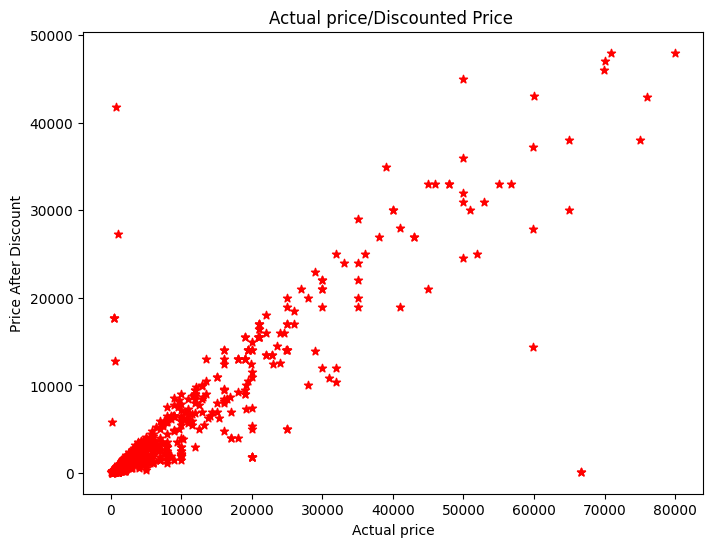

In [18]:
plt.figure(figsize=(8,6))
plt.title("Actual price/Discounted Price ")
plt.xlabel("Actual price")
plt.ylabel("Price After Discount")
plt.scatter(df_cleaned["actual_price"],df_cleaned["discounted_price"],c="r",marker="*")

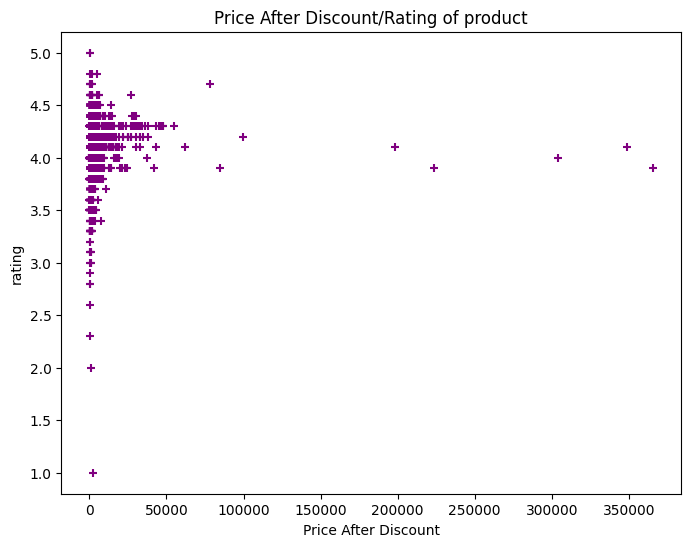

In [19]:
plt.figure(figsize=(8,6))
plt.title("Price After Discount/Rating of product")
plt.xlabel("Price After Discount")
plt.ylabel("rating")
plt.scatter(df["discounted_price"],df["rating"],c="purple",marker="+")

## Most of the product got rating between 3.5 and 4.5

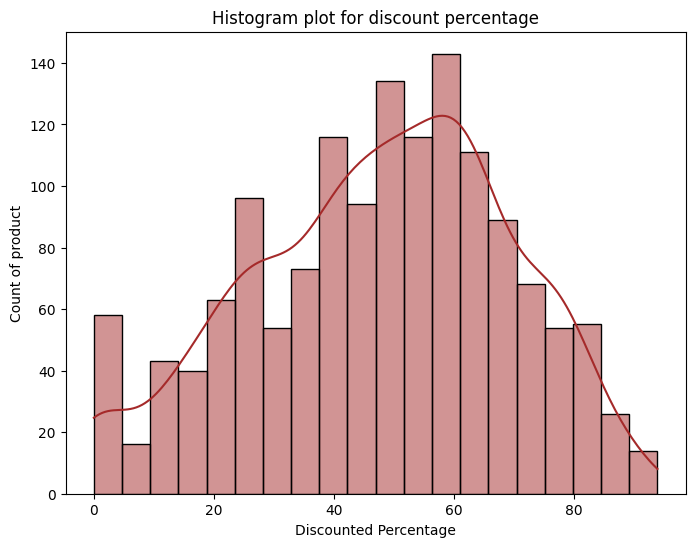

In [20]:
plt.figure(figsize=(8,6))
plt.title("Histogram plot for discount percentage")
plt.xlabel("Discounted Percentage")
plt.ylabel("Count of product")
sns.histplot(df["discount_percentage"],bins=20,kde=True,color="brown")
plt.show()

## More than 140 products got the a discount of 60%

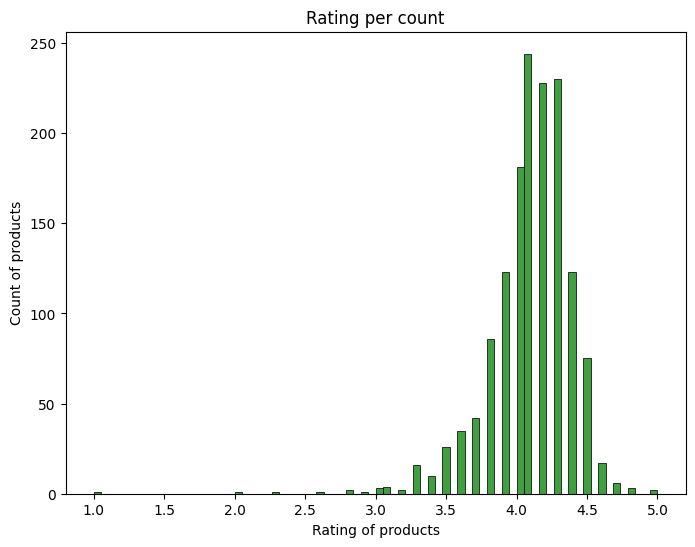

In [21]:
plt.figure(figsize=(8,6))
plt.ylabel("Count of products")
plt.xlabel("Rating of products")
plt.title("Rating per count")
sns.histplot(df["rating"],color="green")
plt.show()

In [22]:
df["category"].unique()

array(['Computers&Accessories', 'Electronics', 'Electronicsécor',
       'MusicalInstruments', 'OfficeProducts', 'Home&Kitchen',
       'HomeImprovement', 'Toys&Games', 'Car&Motorbike',
       'Health&PersonalCare'], dtype=object)

In [23]:
df_max = df.groupby("category")["discount_percentage"].max().reset_index()
df_max

,category,discount_percentage
0,Car&Motorbike,42
1,Computers&Accessories,94
2,Electronics,91
3,Electronicsécor,90
4,Health&PersonalCare,53
5,Home&Kitchen,90
6,HomeImprovement,58
7,MusicalInstruments,60
8,OfficeProducts,75
9,Toys&Games,0


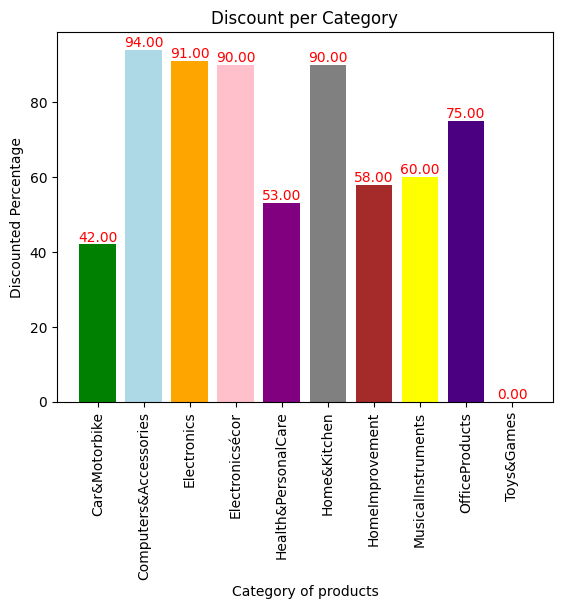

In [24]:
plt.ylabel("Discounted Percentage")
plt.xlabel("Category of products")
plt.title("Discount per Category")

# for the rotation of xlabel
plt.xticks(rotation=90)

#For the multocolor of bar
colors = ['green', 'lightblue', 'orange', 'pink', 'purple', 'grey', 'brown', 'yellow','indigo']

#plotting the bar upto maximum values
bplot = plt.bar(df_max["category"], df_max["discount_percentage"], color=colors[:len(df_max)])

#loop for writting the maximum value on the tip of each bar
for rect, max_value in zip(bplot, df_max["discount_percentage"]):
    plt.text(rect.get_x() + rect.get_width() / 2, max_value, f'{max_value:.2f}', ha='center', va='bottom',color="r")

plt.show()

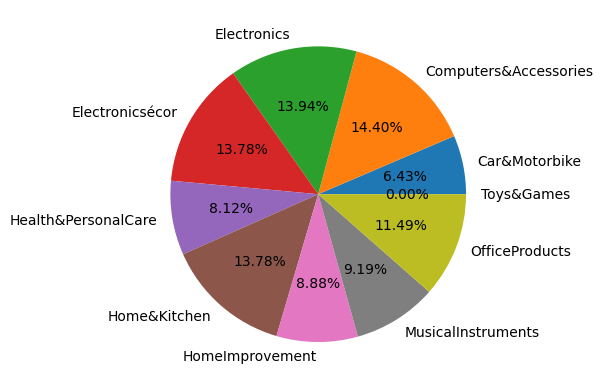

In [25]:
plt.pie(df_max["discount_percentage"],labels=df_max["category"],autopct="%0.2f%%")
plt.show()

# Data Analysis using textblob- finding the reviews good,bad or neutral

In [26]:
pip install textblob

In [27]:
import spacy
from textblob import TextBlob
nlp = spacy.load("en_core_web_sm")
def analyze_sentiment(text):
    doc = nlp(text)
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    if sentiment_score > .5:
        return "Good"
    elif sentiment_score < 0:
        return "Bad"
    else:
        return "Neutral"
    return
msg1="I am so happy!'"
msg2="This is the worst thing ever."
msg3="The product was ok"
print(analyze_sentiment(msg1))
print(analyze_sentiment(msg2))
print(analyze_sentiment(msg3))


Good
Bad
Neutral


In [28]:
df["good"] = df["review_title"].apply(analyze_sentiment)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title,price_after_discount,good
0,B07JW9H4J1,wayona nylon braid usb lightning fast chargin...,Computers&Accessories,399.0,1099.0,64,4.2,24269.0,high compatibility compatible iphone smax r i...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",satisfied charging fast value money product r...,700.0,Good
1,B098NS6PVG,ambrane unbreakable w fast charging m braid t...,Computers&Accessories,199.0,349.0,43,4.0,43994.0,compatible type c enable device android smart...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",good braid cable type c device good quality p...,150.0,Good
2,B096MSW6CT,sounce fast phone charge cable datum sync usb...,Computers&Accessories,199.0,1899.0,90,3.9,7928.0,fast charger datum sync build safety procte...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",good speed early version good product work go...,1700.0,Good
3,B08HDJ86NZ,boat deuce usb type c micro usb stress resist...,Computers&Accessories,329.0,699.0,53,4.2,94363.0,boat deuce usb cable compatible smartphone ta...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",good product good nice nice product time chan...,370.0,Good
4,B08CF3B7N1,portronic konnect l m fast charge pin usb cab...,Computers&Accessories,154.0,399.0,61,4.2,16905.0,charge sync function cable come charge data...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",good original decent good secondary use good ...,245.0,Neutral


In [29]:
df_review = df.groupby("good")["review_title"].count().reset_index()
df_review

,good,review_title
0,Bad,8
1,Good,717
2,Neutral,738


# Data Analysis by nltk-SentimentIntensityAnalyzer-Finding the score of each review

In [30]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download("vader_lexicon")

# Initialize the VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentence
sentence = "I love programming, it's so rewarding!"
score = sia.polarity_scores(sentence)

print(score)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'compound': 0.8707}


In [31]:
# df["rating"][0]
score = sia.polarity_scores(df["review_title"][0])

print(score)

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.9413}
